In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

# Axis Bank Stock Market Analysis & Prediction (Educational Project)

> **Disclaimer:**  
> This notebook is created **for educational and learning purposes only**.  
> It demonstrates how to perform **end-to-end stock data analysis, feature engineering, and predictive modeling** using Python and machine learning.  
>  
> The results, insights, and models shown here **should not be considered financial advice or used for real trading**.  
> Stock markets are inherently volatile and influenced by many external factors not captured in this dataset.  
>  
> This project focuses on:
> - Understanding **time-series data preparation and cleaning**
> - Applying **feature engineering techniques** (momentum, volatility, trend indicators)
> - Building and evaluating **classification models** (Random Forest, XGBoost)
> - Performing **EDA, visualization, and correlation analysis**
> - Demonstrating a **reproducible ML workflow**

---

## Learning Goals

- Practice **data cleaning** and **EDA** on financial data  
- Learn how to engineer meaningful **technical indicators**  
- Understand **time-based train/test splits** (no leakage)  
- Compare different ML models for **stock movement prediction**  
- Evaluate model performance with **classification metrics** (accuracy, precision, recall, F1, ROC-AUC)

---

## Steps that may improve the model

- Add **macroeconomic or sector-level features** (e.g., NIFTY50 index returns, VIX)
- Test **deep learning models** (LSTM, GRU) for sequence-based learning
- Apply **walk-forward validation** for robustness
- Simulate **simple trading strategies** using model outputs
- Optimize feature selection and model parameters further

---

*Author’s Note:*  
This notebook is designed as a clean, readable, and step-by-step guide for anyone learning about **machine learning in finance**.  
You are encouraged to fork it, experiment with your own data, and build upon it!


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv(r'/kaggle/input/nifty50-stock-market-data/AXISBANK.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


# EDA and Data Cleaning

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [38]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

From the above result it can be seen that more than 50% trades column values are missing and around 10% in Deliverable volumes and %Deliverable

In [39]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

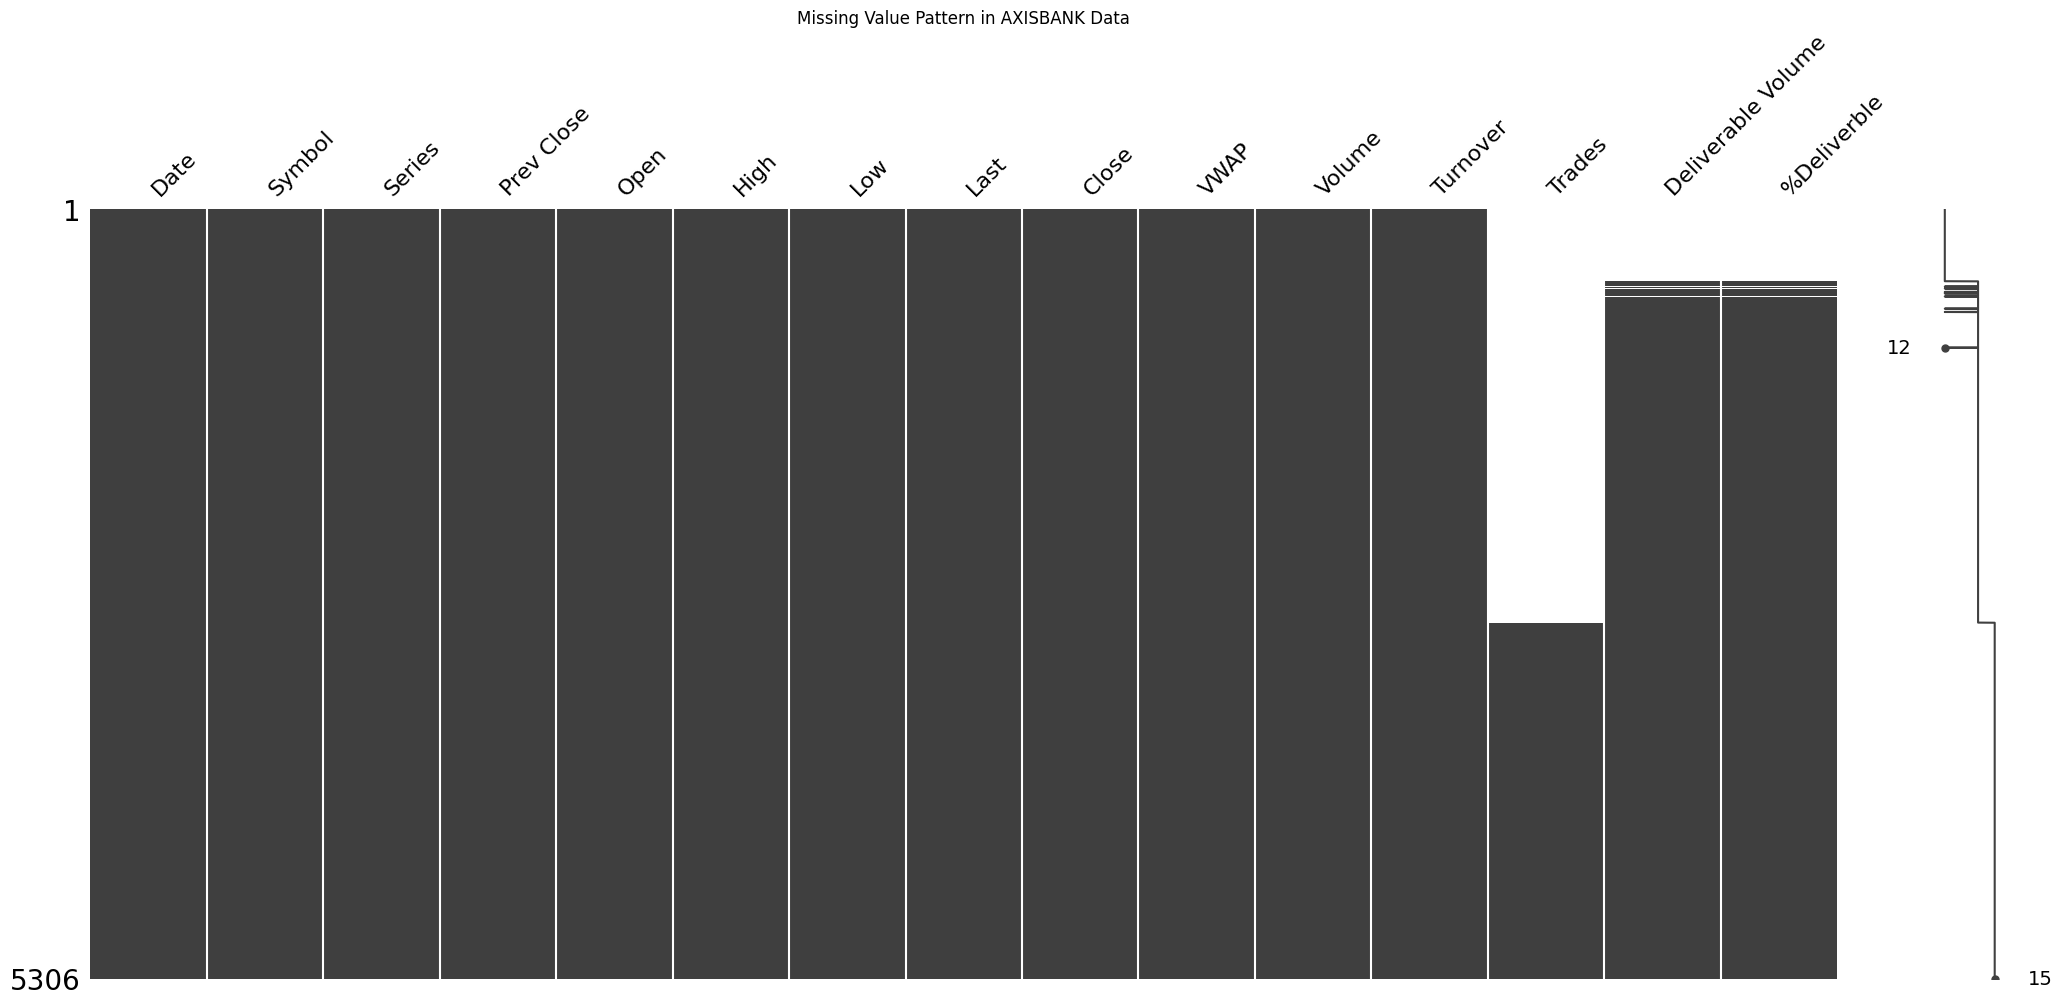

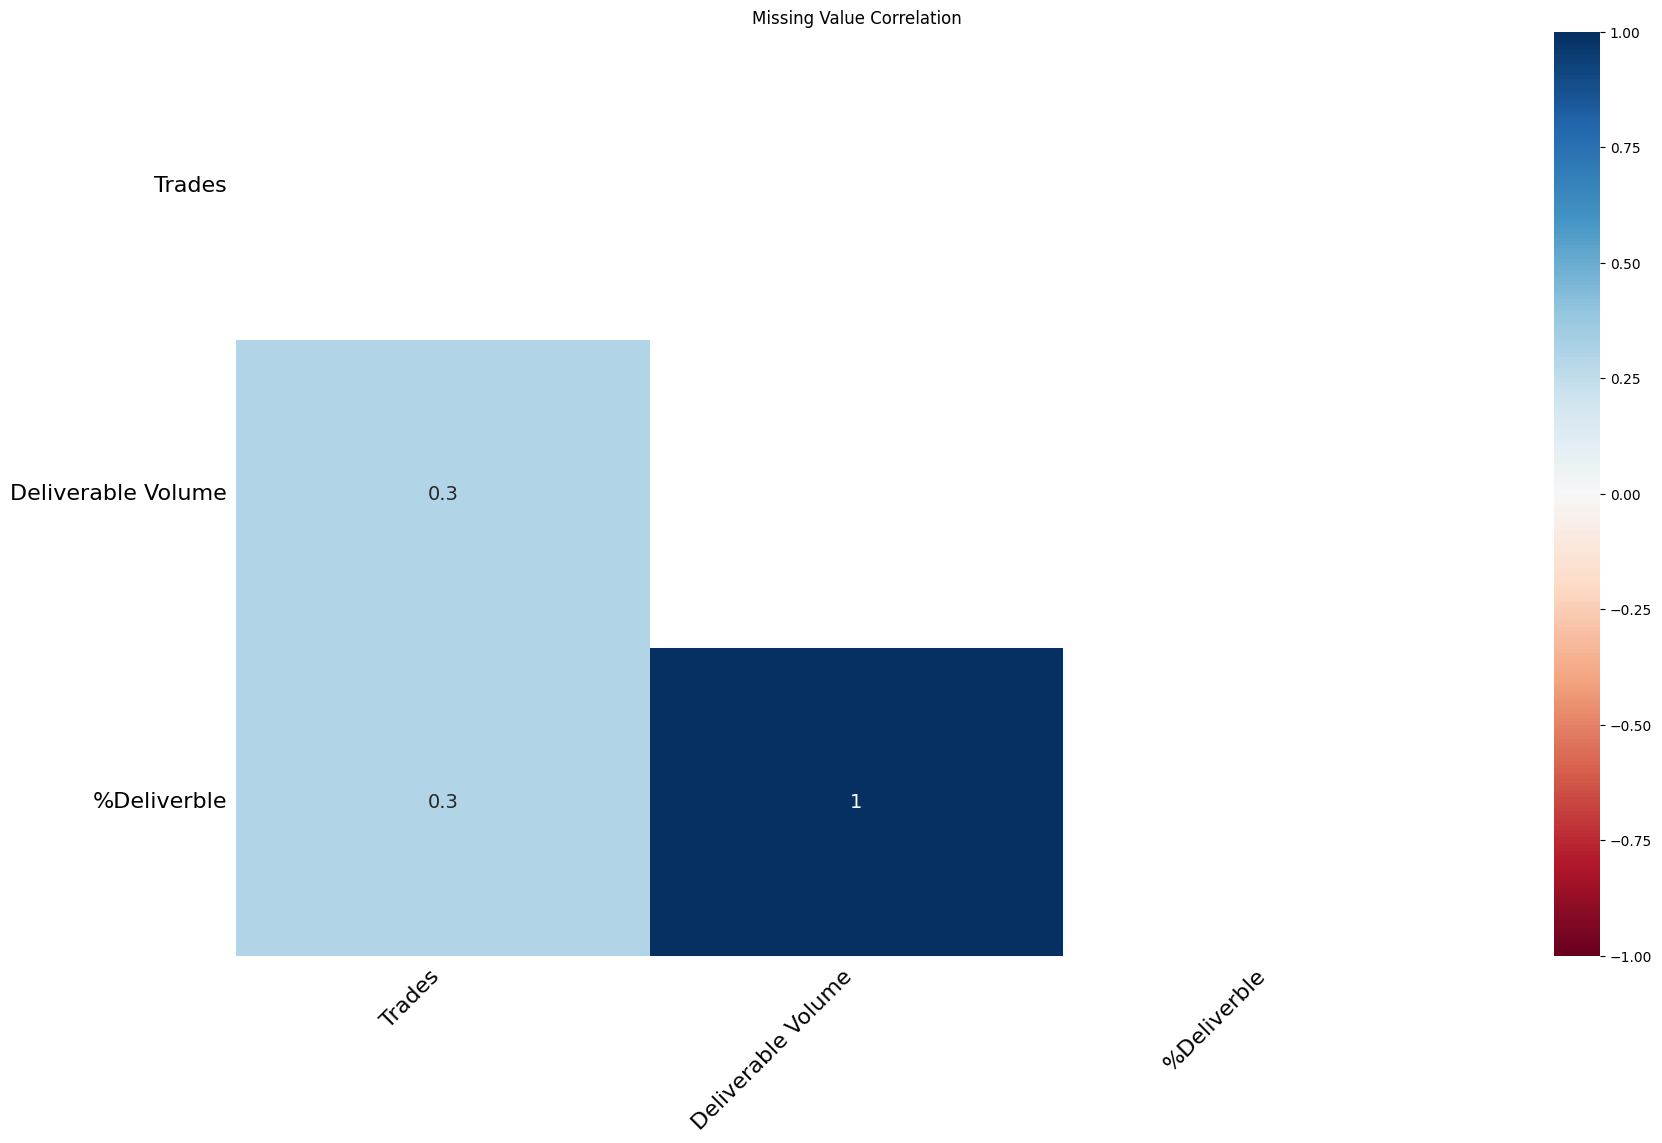

In [40]:
import missingno as msno
msno.matrix(df)
plt.title("Missing Value Pattern in AXISBANK Data")
plt.show()

msno.heatmap(df)
plt.title("Missing Value Correlation")
plt.show()

From the above missing values heatmap we can see that missing values in trades are not holding much significant relationship with missing values of other two columns i.e. it is not very systematically linked with the other two.

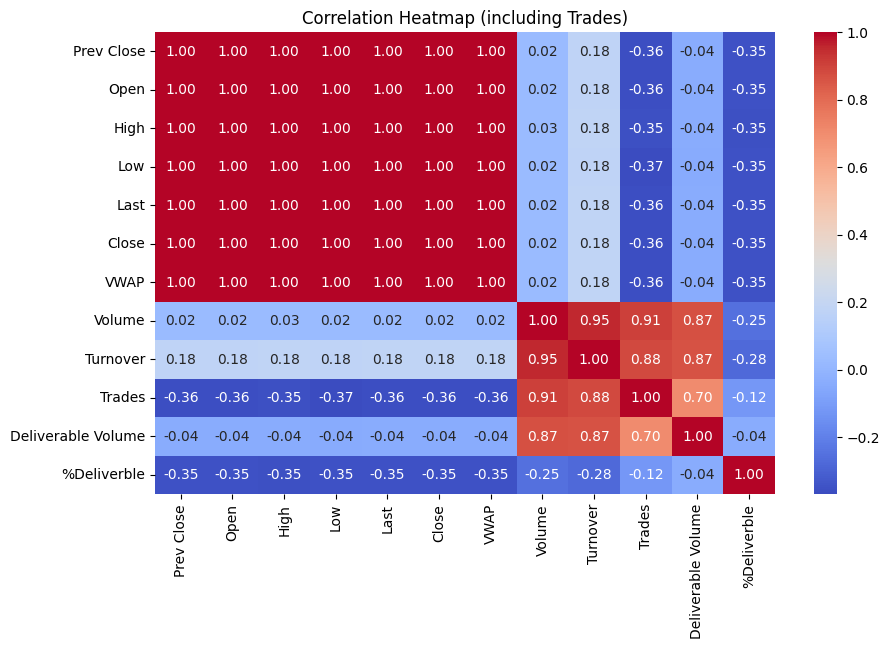

In [41]:
# Select only numeric columns
num_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation
corr = num_df.corr()

# Visualize
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (including Trades)")
plt.show()

# Reason for removal of Trades
From the correlation heatmap we can see that Trades has very high correlation with Volume, Turnover and Deliverable Volume i.e. they describe the same thing and since Trades also has almost 53% places null so here dropping the Trades column is better option as compared to imputing

In [42]:
df.drop(columns=['Trades'], inplace = True)

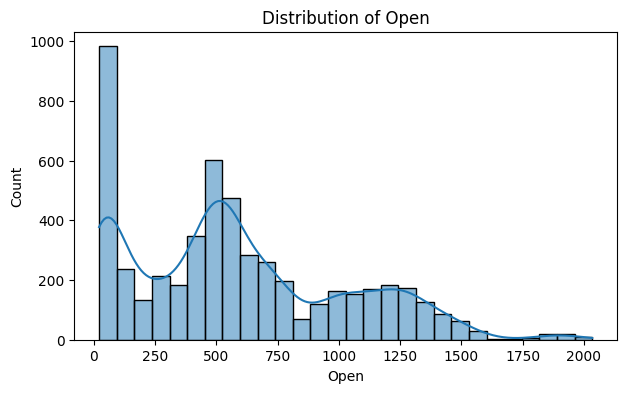

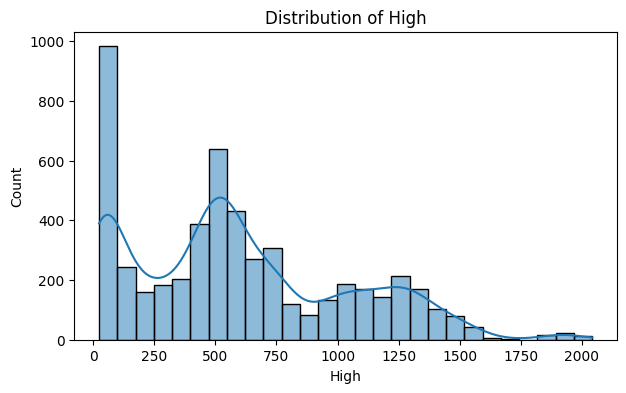

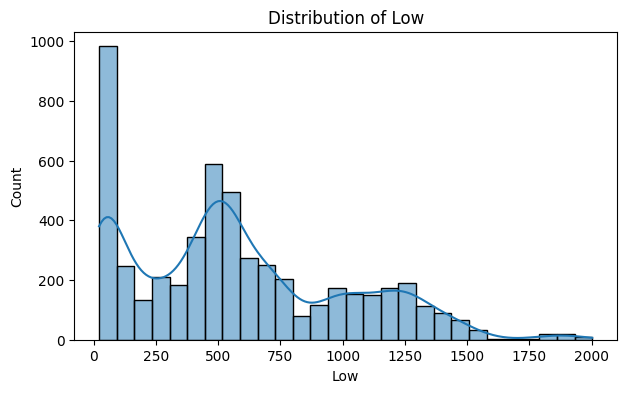

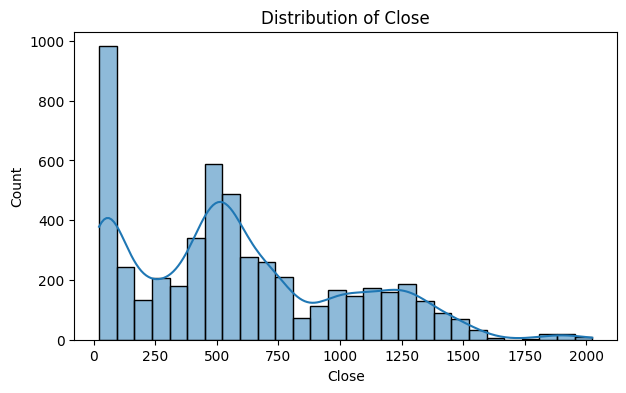

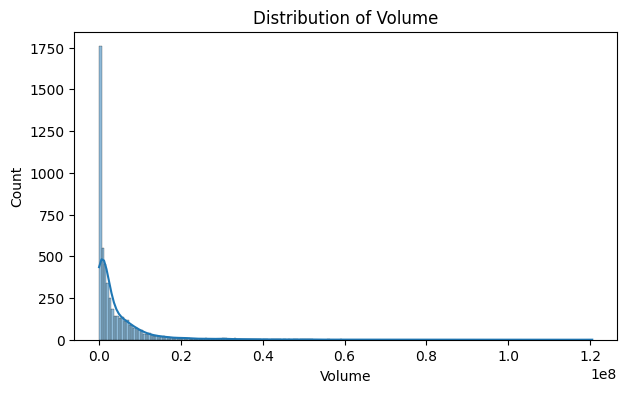

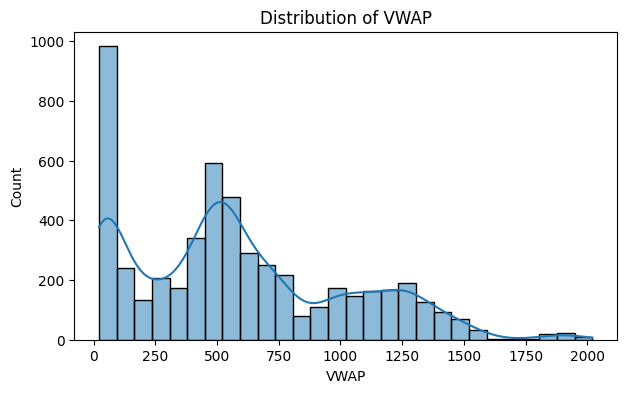

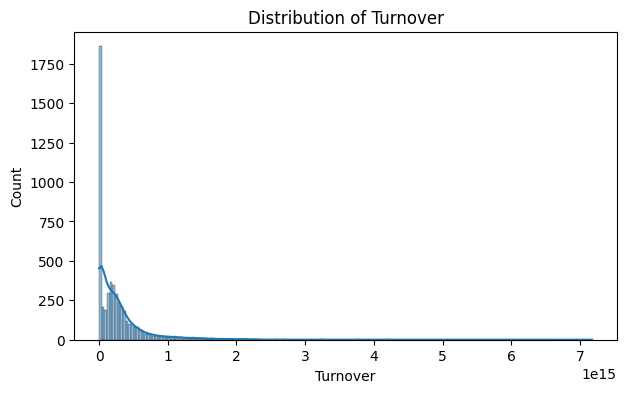

In [43]:
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP', 'Turnover']
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde = True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Log Transformation
From the above histograms we can see that some of the features have very right skewed histograms having spikes at some initial points so for these kind of situations we use Log Transformation which reduces skewness and scales down the very large values and thus makes the input balanced.

Doing for Turnover and Volumes as they are heavily right skewed.

In [44]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [45]:
df['Turnover_log'] = np.log1p(df['Turnover'])
df['Volume_log'] = np.log1p(df['Volume'])

# Comparing the plots after log transformation

<Axes: xlabel='Volume_log', ylabel='Count'>

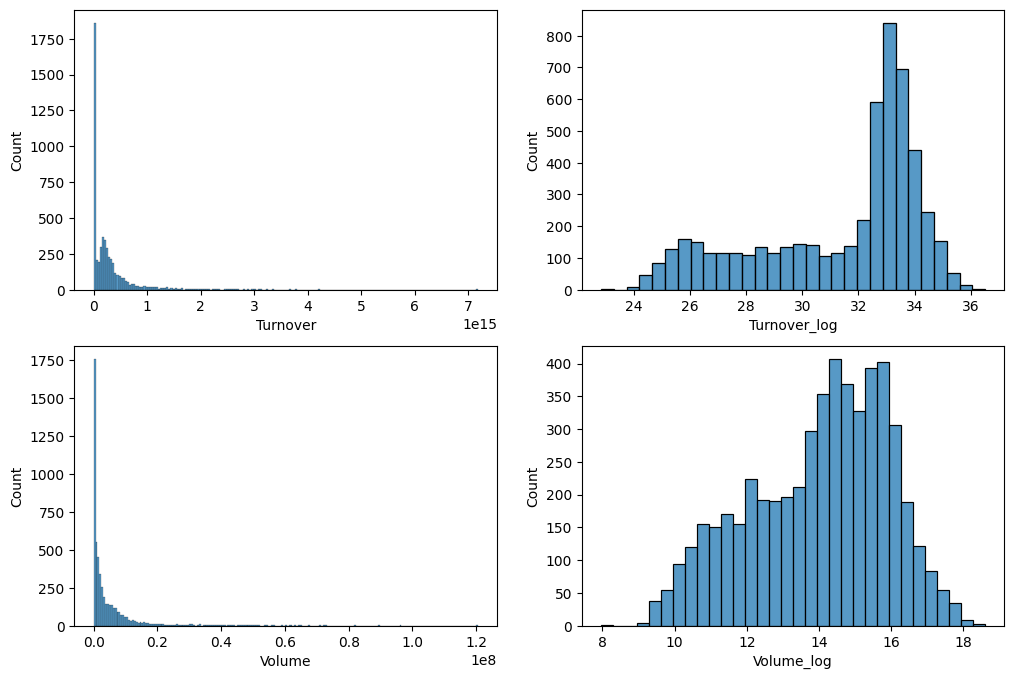

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

sns.histplot(df['Turnover'], ax=axes[0])
sns.histplot(df['Turnover_log'], ax=axes[1])
sns.histplot(df['Volume'], ax=axes[2])
sns.histplot(df['Volume_log'], ax=axes[3])

# Converting Date to datetime object
This helps in extracting things like date, month and year as pandas works well with datetime object and not string date

In [47]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date') #sorting by date essential in time-series analysis 

# Imputing Deliverable Volume and %Deliverable
Since here only around 9% of total data was missing so we go for imputing these columns

-> Forward-fill for Deliverable Volume:
    Time-series continuity: In stock data, missing Deliverable Volume           usually happens due to holidays, API glitches, or exchange data gaps —      not because the value suddenly dropped to zero.

    Forward filling assumes the next available value is similar to the          previous trading day, which maintains the continuity of the series.

-> Mean method for %Deliverable:

    %Deliverble fluctuates around a typical average (say 25–50%), and small     gaps can be filled with a central tendency measure without distorting       trends much.

    Forward filling here could bias the feature — for instance, a previous      spike (say 90%) would carry forward and mislead trend detection.

# Feature Engineering

Using the following features of stocks to add new features:
- Moving Averages: average price of the stock over the last few days
- Volume: how many shares were traded on a given day
- Volatility: how much the stock's price jumps around

In [48]:
windows = [5, 10, 20, 30, 50, 100]   # trying different windows and will keep the best one
target = 1    

In [49]:
df['Return'] = df['Close'].pct_change()
df['Next_Return'] = df['Return'].shift(-target) # making a new day return column to find corr between new columns and keep the best one

In [50]:
ma_feat_cols = []
for w in windows:
    ma_col = f'MA_{w}'
    pos_col = f'MApos_{w}'
    df[ma_col] = df['Close'].rolling(w).mean()
    df[pos_col] = df['Close'] / df[ma_col] - 1
    ma_feat_cols.append(pos_col)

In [51]:
vol_feat_cols = []
for w in windows:
    vma_col = f'VolMA_{w}'
    vratio_col = f'VolRatio_{w}'
    df[vma_col] = df['Volume'].rolling(w).mean()
    df[vratio_col] = df['Volume'] / df[vma_col] - 1
    vol_feat_cols.append(vratio_col)

In [52]:
volty_feat_cols = []
for w in windows:
    vcol = f'Volatility_{w}'
    df[vcol] = df['Return'].rolling(w).std()
    volty_feat_cols.append(vcol)

In [53]:
def pick_best_feature(feature_cols, label=''):
    cols = [c for c in feature_cols if c in df.columns]
    corr_df = df[cols + ['Next_Return']].dropna()
    if corr_df.empty:
        return None, pd.Series(dtype=float)  # nothing to rank
    corrs = corr_df.corr()['Next_Return'].drop('Next_Return')
    best = corrs.abs().idxmax()
    print(f"[{label}] Best feature: {best} (corr={corrs[best]:.4f})")
    return best, corrs.sort_values(key=np.abs, ascending=False)

best_ma,     ma_corrs     = pick_best_feature(ma_feat_cols,     'MA position')
best_vol,    vol_corrs    = pick_best_feature(vol_feat_cols,    'Volume ratio')
best_volty,  volty_corrs  = pick_best_feature(volty_feat_cols,  'Volatility')

to_keep = {best_ma, best_vol, best_volty}
to_keep = {c for c in to_keep if c is not None}

intermediate_cols = [c for w in windows for c in (f'MA_{w}', f'VolMA_{w}')]
engineered_cols = set(ma_feat_cols + vol_feat_cols + volty_feat_cols)

to_drop = list((engineered_cols - to_keep) | set(intermediate_cols))
df.drop(columns=[c for c in to_drop if c in df.columns], inplace=True)

print("\nKept features:", to_keep)
print("Dropped columns:", len(to_drop))

[MA position] Best feature: MApos_100 (corr=-0.0102)
[Volume ratio] Best feature: VolRatio_5 (corr=0.0146)
[Volatility] Best feature: Volatility_5 (corr=0.0172)

Kept features: {'Volatility_5', 'VolRatio_5', 'MApos_100'}
Dropped columns: 27


array([[<Axes: title={'center': 'MApos_100'}>,
        <Axes: title={'center': 'VolRatio_5'}>],
       [<Axes: title={'center': 'Volatility_5'}>, <Axes: >]], dtype=object)

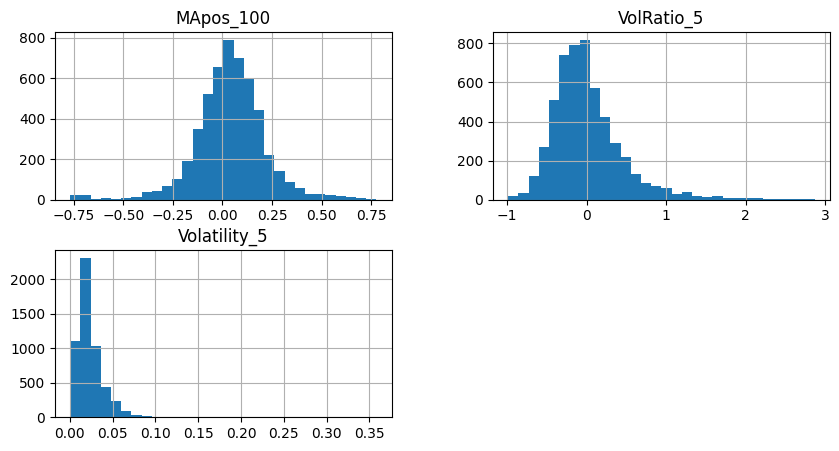

In [54]:
df[['MApos_100', 'VolRatio_5', 'Volatility_5']].hist(bins=30, figsize=(10,5)) # checking feature distribution

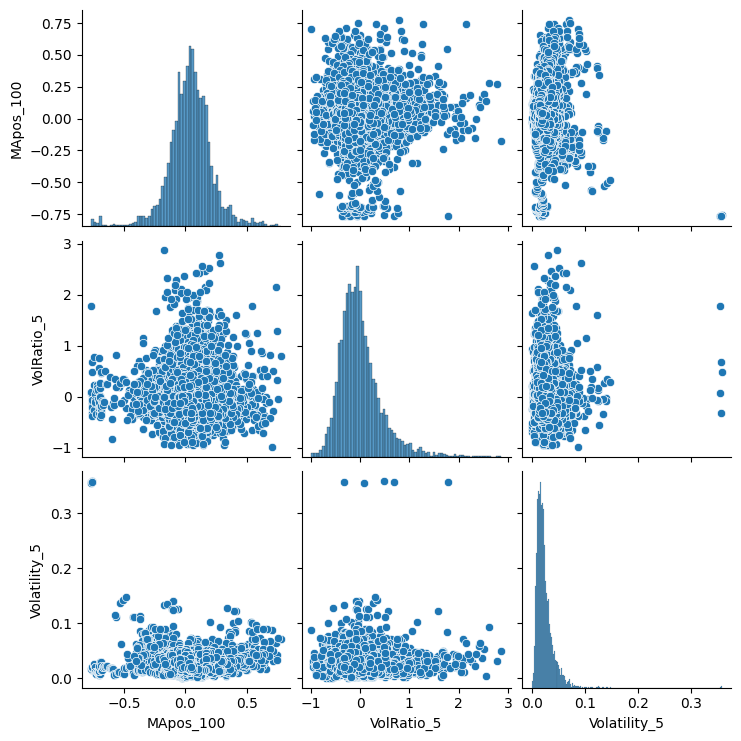

In [55]:
sns.pairplot(df, vars=['MApos_100', 'VolRatio_5', 'Volatility_5'], y_vars='Next_Return')

In [56]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble', 'Turnover_log', 'Volume_log', 'Return', 'Next_Return',
       'MApos_100', 'VolRatio_5', 'Volatility_5'],
      dtype='object')

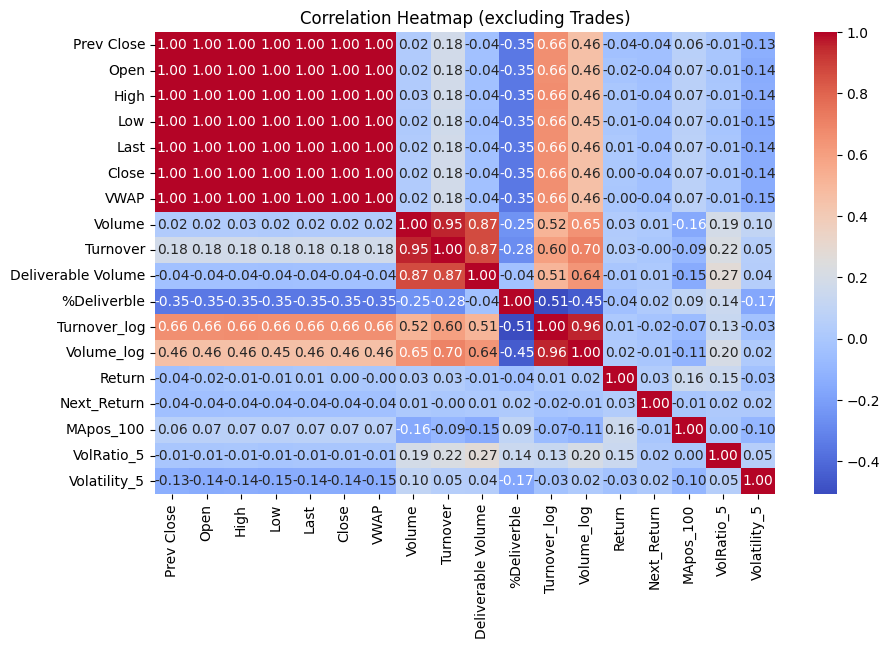

In [57]:
# Select only numeric columns
num_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation
corr = num_df.corr()

# Visualize
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (excluding Trades)")
plt.show()

# Choice of Dropping some more features
- in the top left part of above heatmap it can be seen that many columns are having a corr of 1.
- it is because they all more or less propagate similar information.
- keeping all them may lead to multicollinearity (makes models unstable and coefficients meaningless).
- they only inflate model size and training time without increasing accuracy.

In [58]:
# handling price columns
df.drop(columns=['Prev Close','Open','High','Low','Last','VWAP'], inplace=True)

In [59]:
df.drop(columns=['Turnover','Deliverable Volume','Turnover_log'], inplace=True)

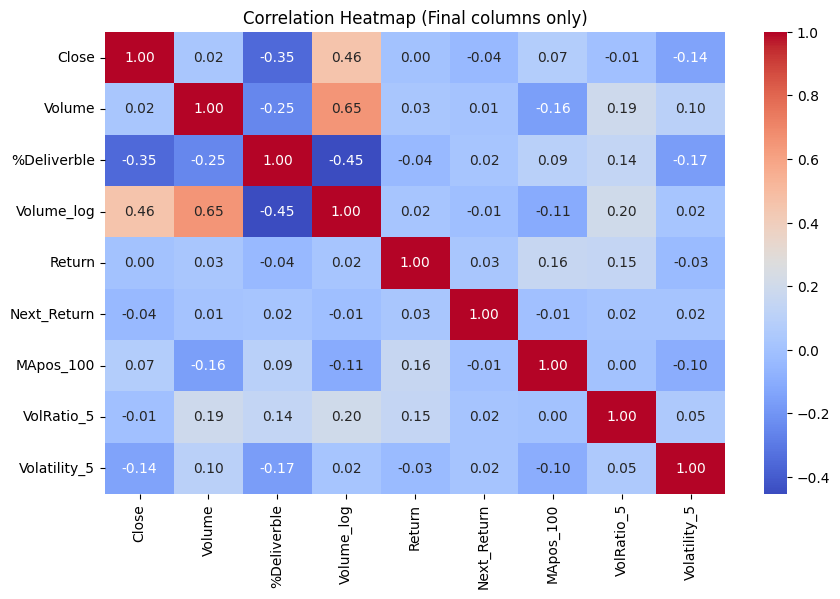

In [60]:
# Select only numeric columns
num_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation
corr = num_df.corr()

# Visualize
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Final columns only)")
plt.show()

In [61]:
df.shape

(5306, 12)

In [62]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Close', 'Volume', '%Deliverble',
       'Volume_log', 'Return', 'Next_Return', 'MApos_100', 'VolRatio_5',
       'Volatility_5'],
      dtype='object')

# Model Making (Classification)
- Classification _ Predicting whether tomorrow stock will go up or down
- using random forest.

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
df = df.sort_values('Date').reset_index(drop=True) # sorted by time is imp in time series analysis
df['Target'] = np.where(df['Next_Return'] > 0, 1, 0)

features = ['Close', 'Volume_log', '%Deliverble', 'Return',
            'MApos_100', 'VolRatio_5', 'Volatility_5']

data = df[features + ['Target']].dropna().copy()
x = data[features]
y = data['Target']

split_idx = int(len(x) * 0.80)
x_train, x_test = x.iloc[:split_idx], x.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"Train rows: {len(x_train)}, Test rows: {len(x_test)}")

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced_subsample'   # helps if classes are a bit imbalanced
)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
y_proba = rf.predict_proba(x_test)[:, 1]  

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)
auc  = roc_auc_score(y_test, y_proba)

print("\n=== Hold-out (last 20%) Performance ===")
print(f"Accuracy    : {acc:.4f}")
print(f"Precision   : {prec:.4f}")
print(f"Recall      : {rec:.4f}")
print(f"F1 Score    : {f1:.4f}")
print(f"ROC-AUC     : {auc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

Train rows: 3837, Test rows: 960

=== Hold-out (last 20%) Performance ===
Accuracy    : 0.5010
Precision   : 0.5055
Recall      : 0.4773
F1 Score    : 0.4910
ROC-AUC     : 0.5005

Classification Report:
              precision    recall  f1-score   support

           0     0.4970    0.5252    0.5107       476
           1     0.5055    0.4773    0.4910       484

    accuracy                         0.5010       960
   macro avg     0.5012    0.5012    0.5008       960
weighted avg     0.5013    0.5010    0.5008       960



We got low accuracy on Random-Forest as data might be highly random and we need better choices for algorithms as well as some features because trading data is highly random.

# Trying Hyper-parameter tuning on RandomForest

Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best CV AUC: 0.5059
Best params: {'n_estimators': 300, 'min_samples_split': 50, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 6, 'bootstrap': True}
Best threshold from validation (max F1): 0.445

=== Test Performance (threshold = 0.50) ===
Accuracy  : 0.4927
Precision : 0.4975
Recall    : 0.6054
F1 Score  : 0.5461
ROC-AUC   : 0.4801

Classification Report:
              precision    recall  f1-score   support

           0     0.4852    0.3782    0.4250       476
           1     0.4975    0.6054    0.5461       484

    accuracy                         0.4927       960
   macro avg     0.4913    0.4918    0.4856       960
weighted avg     0.4914    0.4927    0.4861       960


=== Test Performance (threshold = 0.44) ===
Accuracy  : 0.5021
Precision : 0.5031
Recall    : 0.9959
F1 Score  : 0.6685
ROC-AUC   : 0.4801

Classification Report:
              precision    recall  f1-score   support

           0     0

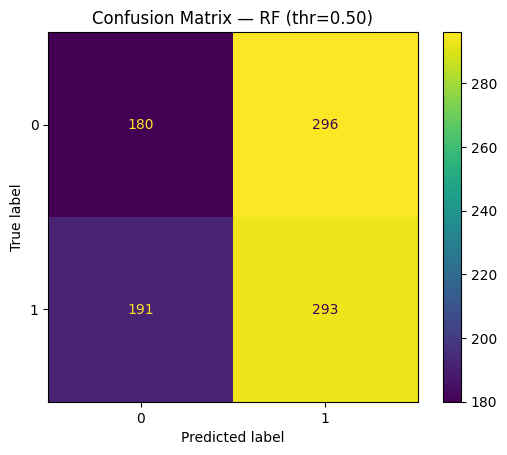

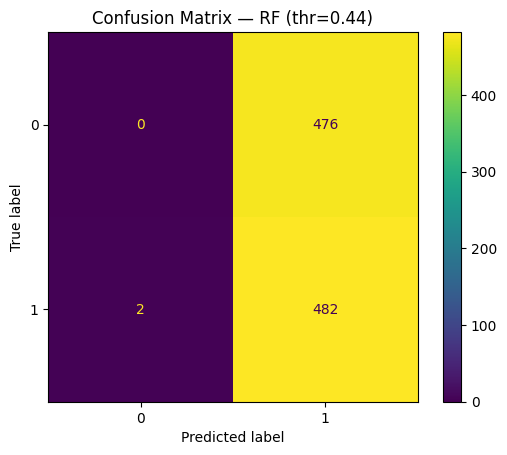

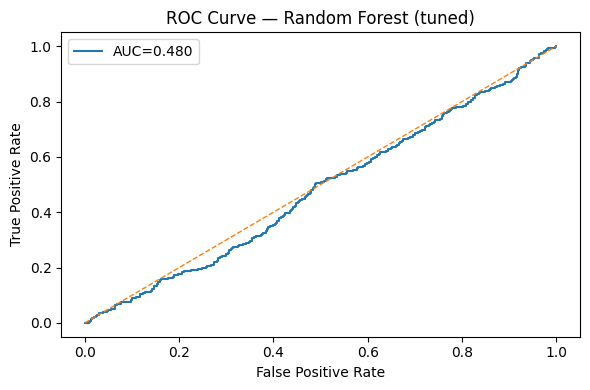

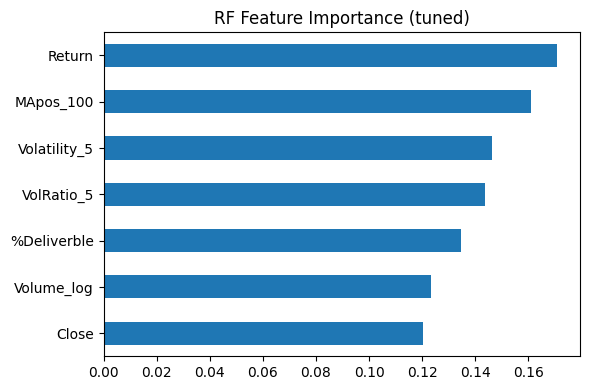

In [64]:
# ===============================
# Random Forest fine-tuning (time-series safe)
# Reuses: x_train, x_test, y_train, y_test
# ===============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, precision_recall_curve,
                             classification_report, ConfusionMatrixDisplay)

# ----- 1) CV setup (walk-forward style)
tscv = TimeSeriesSplit(n_splits=5)

# ----- 2) Model + hyperparameter search space
rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced_subsample',
    n_jobs=-1
)

param_distributions = {
    "n_estimators":        np.arange(300, 1201, 100),
    "max_depth":           [3, 4, 5, 6, 8, 10, None],
    "min_samples_split":   [2, 5, 10, 20, 50],
    "min_samples_leaf":    [1, 2, 4, 8, 16],
    "max_features":        ["sqrt", "log2", 0.5, 0.7, None],
    "bootstrap":           [True, False]
}

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=40,
    scoring="roc_auc",          # rank by probability quality
    cv=tscv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# ----- 3) Run CV search on the training data only
search.fit(x_train, y_train)
print("\nBest CV AUC:", round(search.best_score_, 4))
print("Best params:", search.best_params_)

best_rf = search.best_estimator_

# ----- 4) Optional: tune probability threshold on a *time-ordered* validation slice from the end of train
val_cut = int(len(x_train) * 0.90)  # last 10% of train as validation
x_tr, x_val = x_train.iloc[:val_cut], x_train.iloc[val_cut:]
y_tr, y_val = y_train.iloc[:val_cut], y_train.iloc[val_cut:]

best_rf.fit(x_tr, y_tr)
y_val_proba = best_rf.predict_proba(x_val)[:, 1]

prec, rec, thr = precision_recall_curve(y_val, y_val_proba)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-12)
best_thr = thr[np.nanargmax(f1_scores)] if len(thr) > 0 else 0.5
print(f"Best threshold from validation (max F1): {best_thr:.3f}")

# Refit best model on full training set (no validation leakage into parameters)
best_rf.fit(x_train, y_train)

# ----- 5) Evaluate on hold-out test
y_proba = best_rf.predict_proba(x_test)[:, 1]
y_pred_05 = (y_proba >= 0.5).astype(int)
y_pred_tuned = (y_proba >= best_thr).astype(int)

def report(y_true, y_pred, y_prob, title):
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)
    auc  = roc_auc_score(y_true, y_prob)
    print(f"\n=== {title} ===")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4))

report(y_test, y_pred_05, y_proba, "Test Performance (threshold = 0.50)")
report(y_test, y_pred_tuned, y_proba, f"Test Performance (threshold = {best_thr:.2f})")

# ----- 6) Confusion matrices
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_05)
plt.title("Confusion Matrix — RF (thr=0.50)")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tuned)
plt.title(f"Confusion Matrix — RF (thr={best_thr:.2f})")
plt.show()

# ----- 7) ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0,1],[0,1],'--',linewidth=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest (tuned)")
plt.legend(); plt.tight_layout(); plt.show()

# ----- 8) Feature importance
imp = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values()
imp.plot(kind='barh', figsize=(6,4), title="RF Feature Importance (tuned)")
plt.tight_layout(); plt.show()


This proved that hyper-parameter tuning doesn't help always our accuracy didn't improve much went from 50.10 to 50.21

# Changes made in model
- 5 day ahead direction instead of 1 day
- Indicators like RSI, MACD, Bollinger Width, MA ratios, lagged returns added
- used XGBoost

- From this our accuracy went up by 2% and decent recall of around 70% and f1 score of around 60%

train rows: 3837, test rows: 960
tuned threshold (max F1 on validation): 0.454

=== Test (threshold = 0.50) ===
Accuracy  : 0.5208
Precision : 0.5383
Recall    : 0.6758
F1 Score  : 0.5993
ROC-AUC   : 0.5392

Classification Report:
              precision    recall  f1-score   support

           0     0.4860    0.3459    0.4041       451
           1     0.5383    0.6758    0.5993       509

    accuracy                         0.5208       960
   macro avg     0.5122    0.5109    0.5017       960
weighted avg     0.5137    0.5208    0.5076       960


=== Test (threshold = 0.45) ===
Accuracy  : 0.5219
Precision : 0.5327
Recall    : 0.7996
F1 Score  : 0.6394
ROC-AUC   : 0.5392

Classification Report:
              precision    recall  f1-score   support

           0     0.4796    0.2084    0.2906       451
           1     0.5327    0.7996    0.6394       509

    accuracy                         0.5219       960
   macro avg     0.5062    0.5040    0.4650       960
weighted avg     0

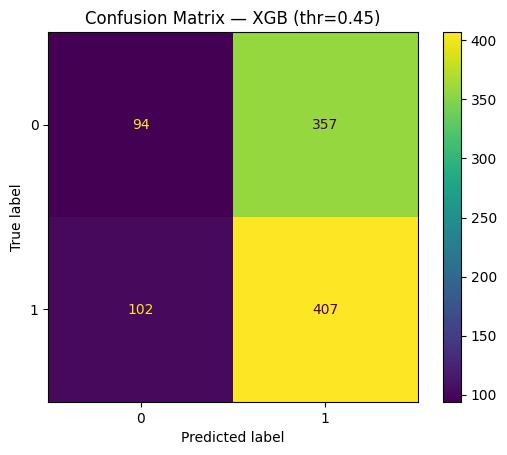

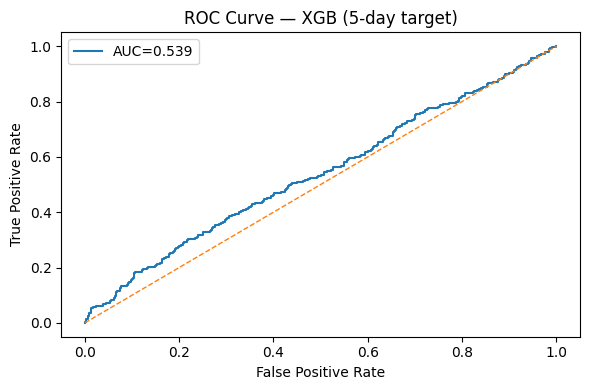

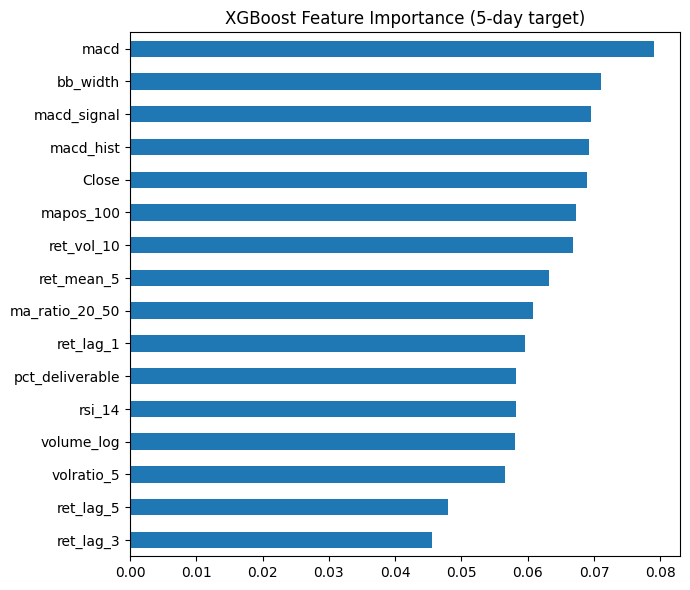

In [65]:
# ===============================
# Axis Bank — 5-Day Direction Model (Upgraded Features + XGBoost)
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, roc_auc_score, roc_curve,
                             ConfusionMatrixDisplay, precision_recall_curve)

# ---------- 0) Sort time & basic returns ----------
df = df.sort_values('Date').reset_index(drop=True).copy()
df['return_1d'] = df['Close'].pct_change()

# ---------- 1) Target: 5-day ahead direction (smoother, less noisy) ----------
df['next_5d_return'] = df['Close'].pct_change(5).shift(-5)
df['target'] = np.where(df['next_5d_return'] > 0, 1, 0)

# ---------- 2) Technical indicators (all past-only, no leakage) ----------
# RSI(14)
win = 14
delta = df['Close'].diff()
gain = delta.clip(lower=0)
loss = (-delta).clip(lower=0)
avg_gain = gain.rolling(win).mean()
avg_loss = loss.rolling(win).mean()
rs = avg_gain / (avg_loss.replace(0, np.nan))
df['rsi_14'] = 100 - (100 / (1 + rs))

# MACD (12,26,9)
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()
df['macd'] = ema12 - ema26
df['macd_signal'] = df['macd'].ewm(span=9, adjust=False).mean()
df['macd_hist'] = df['macd'] - df['macd_signal']

# Bollinger Band Width (20, 2σ)
mid = df['Close'].rolling(20).mean()
std = df['Close'].rolling(20).std()
upper = mid + 2*std
lower = mid - 2*std
df['bb_width'] = (upper - lower) / mid  # normalized width (volatility proxy)

# Moving averages & distances
df['ma_20'] = df['Close'].rolling(20).mean()
df['ma_50'] = df['Close'].rolling(50).mean()
df['ma_100'] = df['Close'].rolling(100).mean()
df['ma_ratio_20_50'] = df['ma_20'] / df['ma_50']
df['mapos_100'] = df['Close'] / df['ma_100'] - 1  # distance from long-term trend

# Returns: lags & rolling stats (momentum + regime)
df['ret_lag_1'] = df['return_1d'].shift(1)
df['ret_lag_3'] = df['return_1d'].shift(3)
df['ret_lag_5'] = df['return_1d'].shift(5)
df['ret_mean_5'] = df['return_1d'].rolling(5).mean()
df['ret_vol_10'] = df['return_1d'].rolling(10).std()

# Volume features (participation strength)
if 'Volume' in df.columns:
    df['volume_log'] = np.log1p(df['Volume'])
    df['vol_ma_5'] = df['Volume'].rolling(5).mean()
    df['volratio_5'] = df['Volume'] / df['vol_ma_5'] - 1
else:
    df['volume_log'] = np.nan
    df['volratio_5'] = np.nan

# Optional: investor intent (keep if present)
if '%Deliverble' in df.columns:
    df['pct_deliverable'] = df['%Deliverble']
else:
    df['pct_deliverable'] = np.nan

# ---------- 3) Final feature set ----------
feature_candidates = [
    'Close',
    'volume_log', 'pct_deliverable',
    'rsi_14', 'macd', 'macd_signal', 'macd_hist',
    'bb_width',
    'ma_ratio_20_50', 'mapos_100',
    'ret_lag_1', 'ret_lag_3', 'ret_lag_5',
    'ret_mean_5', 'ret_vol_10',
    'volratio_5'
]

# Drop rows with NaNs caused by rolling windows (past-only features)
data = df[feature_candidates + ['target']].dropna().copy()
x = data[feature_candidates]
y = data['target']

# ---------- 4) Time-based split (80/20, no leakage) ----------
split_idx = int(len(x) * 0.80)
x_train, x_test = x.iloc[:split_idx], x.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"train rows: {len(x_train)}, test rows: {len(x_test)}")

# ---------- 5) XGBoost (regularized, robust defaults) ----------
xgb_clf = XGBClassifier(
    n_estimators=800,
    learning_rate=0.01,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=5,
    reg_lambda=5,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss',
    use_label_encoder=False
)

# Optional: tune decision threshold using last 10% of train
val_idx = int(len(x_train) * 0.90)
x_tr, x_val = x_train.iloc[:val_idx], x_train.iloc[val_idx:]
y_tr, y_val = y_train.iloc[:val_idx], y_train.iloc[val_idx:]

xgb_clf.fit(x_tr, y_tr)
y_val_proba = xgb_clf.predict_proba(x_val)[:, 1]

prec, rec, thr = precision_recall_curve(y_val, y_val_proba)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-12)
best_thr = thr[np.nanargmax(f1_scores)] if len(thr) > 0 else 0.5
print(f"tuned threshold (max F1 on validation): {best_thr:.3f}")

# Refit on full train and evaluate on test
xgb_clf.fit(x_train, y_train)
y_proba = xgb_clf.predict_proba(x_test)[:, 1]
y_pred_05 = (y_proba >= 0.5).astype(int)
y_pred_tuned = (y_proba >= best_thr).astype(int)

def report(y_true, y_pred, y_prob, title):
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)
    auc  = roc_auc_score(y_true, y_prob)
    print(f"\n=== {title} ===")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4))

report(y_test, y_pred_05, y_proba, "Test (threshold = 0.50)")
report(y_test, y_pred_tuned, y_proba, f"Test (threshold = {best_thr:.2f})")

# ---------- 6) Confusion matrix & ROC ----------
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tuned)
plt.title(f"Confusion Matrix — XGB (thr={best_thr:.2f})")
plt.show()

fpr, tpr, thr2 = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0,1],[0,1],'--',linewidth=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — XGB (5-day target)")
plt.legend(); plt.tight_layout(); plt.show()

# ---------- 7) Feature importance ----------
imp = pd.Series(xgb_clf.feature_importances_, index=x_train.columns).sort_values()
imp.plot(kind='barh', figsize=(7,6), title="XGBoost Feature Importance (5-day target)")
plt.tight_layout(); plt.show()
